# Get City Data

In [37]:
# import the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# create a set of random latitude and longitude combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# add latitudes and longitudes to a list
coordinates = list(lat_lngs)

In [4]:
# import citipy
from citipy import citipy

In [5]:
# list for holding the cities
cities = []

# identify the nearest city for each latitude and longitude combination
for coordinate in coordinates:
    city=citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # if the city is unique, we will add it to the cities list.
    if city not in cities:
        cities.append(city)

# print the city count to confirm sufficiant count
len(cities)

619

In [16]:
# import requests library
import requests

#import datetime
from datetime import datetime

# import API key
from config import weather_api_key

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [24]:
# create an empty list to hold the weather data
city_data = []

# print the beginning of the logging
print('Beginning Data Retrieval       ')
print('-------------------------------')

# create counters
record_count = 1
set_count = 1

# loop through all the cities in our lists

for i, city in enumerate(cities):
    
    # group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # create endpoint URL with each city
    city_url = url + '&q=' + city.replace (" ","+")
    
    # log the url, record, and set numbers and city
    print(f'Processing Record {record_count} of Set {set_count} | {city}')
    # add 1 to record count
    record_count += 1
  
    #testing
#     city_lat = city_weather['coord']['lat']
#     city_lng = city_weather['coord']['lon']
#     city_max_temp = city_weather['main']['temp_max']
#     city_humidity = city_weather['main']['humidity']
#     city_clouds = city_weather['clouds']['all']
#     city_wind = city_weather['wind']['speed']
#     city_country = city_weather['sys']['country']
#     print(city.title())
#     print(city_lat)
#     print(city_lng)
#     print(city_max_temp)
#     print(city_humidity)
#     print(city_clouds)
#     print(city_wind)
#     print(city_country)
#     city_date = datetime.utcfromtimestamp(city_weather['dt']).strftime('%Y-%d-%d %H:%M:%S')

    
    # run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        
        # parse out the needed data
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        
        # convert date into ISO standard
        city_date = datetime.utcfromtimestamp(city_weather['dt']).strftime('%Y-%d-%d %H:%M:%S')
        
        #append city info into city_data list
        city_data.append({'City': city.title(),
                          'Lat': city_lat,
                          'Lng':city_lng,
                          'Max Temp':city_max_temp,
                          'Humidity': city_humidity,
                          'Cloudiness':city_clouds,
                          'Wind Speed':city_wind,
                          'Country': city_country,
                          'Date':city_date})
    # if an error is experienced
    except:
        print('City not found. Skipping...')
        pass

# indicate that data loading is complete
print('------------------------------')
print('Data Retrieval Complete       ')
print('------------------------------') 
        

Beginning Data Retrieval       
-------------------------------
Processing Record 1 of Set 1 | mataura
Processing Record 2 of Set 1 | tateyama
Processing Record 3 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 4 of Set 1 | tasiilaq
Processing Record 5 of Set 1 | barbar
City not found. Skipping...
Processing Record 6 of Set 1 | nokaneng
Processing Record 7 of Set 1 | bluff
Processing Record 8 of Set 1 | singleton
Processing Record 9 of Set 1 | lebu
Processing Record 10 of Set 1 | saldanha
Processing Record 11 of Set 1 | sinnamary
Processing Record 12 of Set 1 | grindavik
Processing Record 13 of Set 1 | te anau
Processing Record 14 of Set 1 | baruun-urt
Processing Record 15 of Set 1 | fairbanks
Processing Record 16 of Set 1 | kapaa
Processing Record 17 of Set 1 | oksfjord
Processing Record 18 of Set 1 | aurillac
Processing Record 19 of Set 1 | vaini
Processing Record 20 of Set 1 | wilkie
Processing Record 21 of Set 1 | hermanus
Processing Record 22 of Set 1 | c

Processing Record 38 of Set 4 | esperance
Processing Record 39 of Set 4 | morehead
Processing Record 40 of Set 4 | iskateley
Processing Record 41 of Set 4 | mount isa
Processing Record 42 of Set 4 | kulmbach
Processing Record 43 of Set 4 | khatanga
Processing Record 44 of Set 4 | nuuk
Processing Record 45 of Set 4 | kudahuvadhoo
Processing Record 46 of Set 4 | slave lake
Processing Record 47 of Set 4 | chongwe
Processing Record 48 of Set 4 | gushikawa
Processing Record 49 of Set 4 | warmbad
Processing Record 50 of Set 4 | aguimes
Processing Record 1 of Set 5 | iquique
Processing Record 2 of Set 5 | bonavista
Processing Record 3 of Set 5 | pisco
Processing Record 4 of Set 5 | san pedro
Processing Record 5 of Set 5 | stockholm
Processing Record 6 of Set 5 | nanortalik
Processing Record 7 of Set 5 | kaitangata
Processing Record 8 of Set 5 | bilibino
Processing Record 9 of Set 5 | ilulissat
Processing Record 10 of Set 5 | ust-barguzin
Processing Record 11 of Set 5 | poltavka
Processing Rec

Processing Record 28 of Set 8 | veraval
Processing Record 29 of Set 8 | inhambane
Processing Record 30 of Set 8 | bunia
Processing Record 31 of Set 8 | falkenberg
Processing Record 32 of Set 8 | balkanabat
Processing Record 33 of Set 8 | sandwick
Processing Record 34 of Set 8 | cayenne
Processing Record 35 of Set 8 | wasilla
Processing Record 36 of Set 8 | bathsheba
Processing Record 37 of Set 8 | paamiut
Processing Record 38 of Set 8 | greenfield
Processing Record 39 of Set 8 | le port
Processing Record 40 of Set 8 | souillac
Processing Record 41 of Set 8 | sanok
Processing Record 42 of Set 8 | rocha
Processing Record 43 of Set 8 | ugoofaaru
Processing Record 44 of Set 8 | komsomolskiy
Processing Record 45 of Set 8 | rorvik
Processing Record 46 of Set 8 | lar
Processing Record 47 of Set 8 | port moresby
Processing Record 48 of Set 8 | byron bay
Processing Record 49 of Set 8 | plouzane
Processing Record 50 of Set 8 | kaeo
Processing Record 1 of Set 9 | galle
Processing Record 2 of Set 

Processing Record 20 of Set 12 | mounana
Processing Record 21 of Set 12 | coihaique
Processing Record 22 of Set 12 | dunedin
Processing Record 23 of Set 12 | achisay
City not found. Skipping...
Processing Record 24 of Set 12 | bay roberts
Processing Record 25 of Set 12 | lixourion
Processing Record 26 of Set 12 | itarema
Processing Record 27 of Set 12 | krutinka
Processing Record 28 of Set 12 | duiwelskloof
Processing Record 29 of Set 12 | nabire
Processing Record 30 of Set 12 | provideniya
Processing Record 31 of Set 12 | adolfo lopez mateos
Processing Record 32 of Set 12 | belaya gora
Processing Record 33 of Set 12 | auburndale
Processing Record 34 of Set 12 | yuzhno-yeniseyskiy
City not found. Skipping...
Processing Record 35 of Set 12 | iqaluit
Processing Record 36 of Set 12 | porto nacional
Processing Record 37 of Set 12 | port hedland
Processing Record 38 of Set 12 | kozhva
Processing Record 39 of Set 12 | kerrabe
City not found. Skipping...
Processing Record 40 of Set 12 | qasig

In [33]:
len(city_data)

576

In [34]:
# convert array of dictionaries to a pandas dataframe
city_data_df = pd.DataFrame(city_data)
city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mataura,-46.1927,168.8643,44.83,84,100,6.40,NZ,2021-25-25 09:37:14
1,Tateyama,34.9833,139.8667,86.05,77,1,9.73,JP,2021-25-25 09:37:15
2,Tasiilaq,65.6145,-37.6368,44.76,94,84,5.57,GL,2021-25-25 09:37:15
3,Nokaneng,-19.6667,22.2667,68.40,34,0,10.38,BW,2021-25-25 09:37:16
4,Bluff,-46.6000,168.3333,48.49,77,100,14.58,NZ,2021-25-25 09:37:16
...,...,...,...,...,...,...,...,...,...
571,Los Altos Hills,37.3797,-122.1375,63.55,87,90,1.99,US,2021-25-25 09:40:45
572,Bubaque,11.2833,-15.8333,77.65,82,100,9.13,GW,2021-25-25 09:40:46
573,Muroto,33.2833,134.1500,82.44,82,100,7.72,JP,2021-25-25 09:40:46
574,Yumen,40.2833,97.2000,91.87,18,10,22.95,CN,2021-25-25 09:40:46


In [35]:
# rearrange dataframe
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']

city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Mataura,NZ,2021-25-25 09:37:14,-46.1927,168.8643,44.83,84,100,6.40
1,Tateyama,JP,2021-25-25 09:37:15,34.9833,139.8667,86.05,77,1,9.73
2,Tasiilaq,GL,2021-25-25 09:37:15,65.6145,-37.6368,44.76,94,84,5.57
3,Nokaneng,BW,2021-25-25 09:37:16,-19.6667,22.2667,68.40,34,0,10.38
4,Bluff,NZ,2021-25-25 09:37:16,-46.6000,168.3333,48.49,77,100,14.58
...,...,...,...,...,...,...,...,...,...
571,Los Altos Hills,US,2021-25-25 09:40:45,37.3797,-122.1375,63.55,87,90,1.99
572,Bubaque,GW,2021-25-25 09:40:46,11.2833,-15.8333,77.65,82,100,9.13
573,Muroto,JP,2021-25-25 09:40:46,33.2833,134.1500,82.44,82,100,7.72
574,Yumen,CN,2021-25-25 09:40:46,40.2833,97.2000,91.87,18,10,22.95


In [36]:
# create the output file (CSV)
output_data_file = 'weather_data/cities.csv'
# export the City_Data into a CSV
city_data_df.to_csv(output_data_file, index_label="City_ID")

# Plot Data

In [38]:
# extract relevant fields from the DataFrame for plotting
lats = city_data_df['Lat']
max_temps = city_data_df['Max Temp']
humidity = city_data_df['Humidity']
cloudiness = city_data_df['Cloudiness']
wind_speed = city_data_df['Wind Speed']

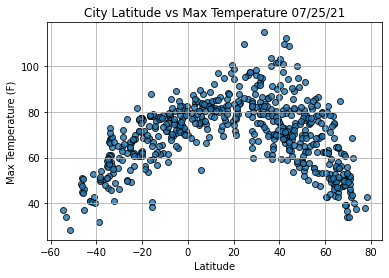

In [47]:
# import time module
import time

# BUILD THE SCATTER PLOT FOR LATITUDE VS. MAX TEMPERATURE
plt.scatter(lats,
           max_temps,
           edgecolor='black', linewidths=1, marker='o',
           alpha=0.8, label='cities')

#incorporate other graph properties
plt.title(f'City Latitude vs Max Temperature ' + time.strftime('%x'))
plt.ylabel('Max Temperature (F)')
plt.xlabel('Latitude')
plt.grid()

#save the figure
plt.savefig('weather_data/Fig1.png')

# show plot
plt.show()

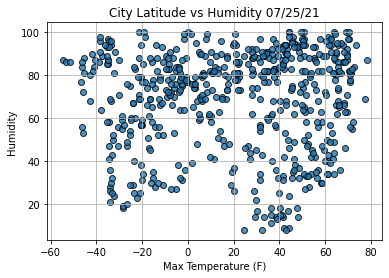

In [48]:
# BUILD THE SCATTER PLOT FOR LATITUDE VS. HUMIDITY
plt.scatter(lats,
           humidity,
           edgecolor='black', linewidths=1, marker='o',
           alpha=0.8, label='cities')

#incorporate other graph properties
plt.title(f'City Latitude vs Humidity ' + time.strftime('%x'))
plt.ylabel('Humidity')
plt.xlabel('Max Temperature (F)')
plt.grid()

#save the figure
plt.savefig('weather_data/Fig2.png')

# show plot
plt.show()

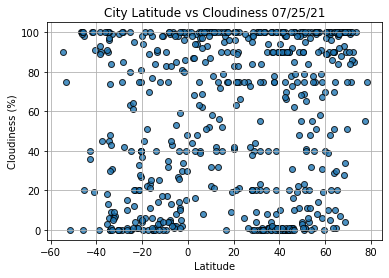

In [49]:
# BUILD THE SCATTER PLOT FOR LATITUDE VS. CLOUDINESS
plt.scatter(lats,
           cloudiness,
           edgecolor='black', linewidths=1, marker='o',
           alpha=0.8, label='cities')

#incorporate other graph properties
plt.title(f'City Latitude vs Cloudiness ' + time.strftime('%x'))
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.grid()

#save the figure
plt.savefig('weather_data/Fig3.png')

# show plot
plt.show()

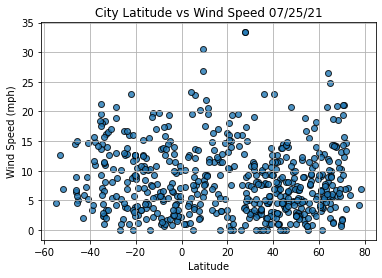

In [50]:
# BUILD THE SCATTER PLOT FOR LATITUDE VS. WIND SPEED
plt.scatter(lats,
           wind_speed,
           edgecolor='black', linewidths=1, marker='o',
           alpha=0.8, label='cities')

#incorporate other graph properties
plt.title(f'City Latitude vs Wind Speed ' + time.strftime('%x'))
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
plt.grid()

#save the figure
plt.savefig('weather_data/Fig4.png')

# show plot
plt.show()